# [데이터 모델링, SQL 응용]

```1. 제공해준 타이타닉 데이터에 대해 아래와 같은 작업을 수행하시오.
1) Pclass를 원핫인코딩
2) Age를 이산화(5개 구간으로 나눔)
3) embarked를 원핫인코딩
```

In [11]:
# 1) Pclass를 원핫인코딩
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

path = r'C:\Users\Administrator\titanic\train.csv'
train = pd.read_csv(path)

In [12]:
train.Pclass
one_hot = pd.get_dummies(data=train.Pclass.fillna('ffill'),prefix='Pclass')
train = pd.concat([train,one_hot],axis=1)
train[['Pclass','Pclass_1','Pclass_2','Pclass_3']]

,Pclass,Pclass_1,Pclass_2,Pclass_3
0,3,0,0,1
1,1,1,0,0
2,3,0,0,1
3,1,1,0,0
4,3,0,0,1
...,...,...,...,...
886,2,0,1,0
887,1,1,0,0
888,3,0,0,1
889,1,1,0,0


In [13]:
# 2) Age를 이산화(5개 구간으로 나눔)
train.Age.fillna(method='bfill', inplace=True)
train['Age_cut'] = pd.qcut(train.Age,4,labels=['A1','A2','A3','A4'])
train[['Age','Age_cut']]

,Age,Age_cut
0,22.0,A2
1,38.0,A3
2,26.0,A2
3,35.0,A3
4,35.0,A3
...,...,...
886,27.0,A2
887,19.0,A1
888,26.0,A2
889,26.0,A2


In [14]:
# 3) embarked를 원핫인코딩
train.Embarked
one_hot_embarked = pd.get_dummies(train.Embarked, prefix='Embarked')
train = pd.concat([train,one_hot_embarked], axis = 1)
train[['Embarked','Embarked_C','Embarked_S','Embarked_Q']]

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,S,0,1,0
1,C,1,0,0
2,S,0,1,0
3,S,0,1,0
4,S,0,1,0
...,...,...,...,...
886,S,0,1,0
887,S,0,1,0
888,S,0,1,0
889,C,1,0,0


```2. bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
타이타닉호 승객을 사망자와 생존자 그룹으로 나누고 각 그룹에 대해 '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구한다. 각 그룹 별로 비율의 전체 합은 1이 되어야 한다.
```

In [19]:
bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
train['Age_group'] = pd.cut(train['Age'],bins=bins,labels=labels)
group = train.groupby('Survived')['Age_group'].value_counts()
died = group[0][:].sum()
alive = group[1][:].sum()
gg = pd.DataFrame(group)
gg

Age_group
Survived Age_group           
0        청년               179
         중년               124
         장년               103
         미성년자             101
         노년                19
1        청년               100
         중년                79
         장년                60
         미성년자              58
         노년                 9

In [21]:
died_Avg = gg.ix[0]/died
survived_Avg = gg.ix[1]/died

In [27]:
print("-------------------------")
print('사망자 그룹별 평균')
print(died_Avg)
print("-------------------------")
print('생존자 그룹별 평균')
print(survived_Avg)
print("-------------------------")

-------------------------
사망자 그룹별 평균
           Age_group
Age_group           
청년          0.340304
중년          0.235741
장년          0.195817
미성년자        0.192015
노년          0.036122
-------------------------
생존자 그룹별 평균
           Age_group
Age_group           
청년          0.190114
중년          0.150190
장년          0.114068
미성년자        0.110266
노년          0.017110
-------------------------


# [기초 알고리즘]

```
문제 1.
길이가 10인 1-벡터를 만드세요.
문제 2.
문제 1에서 만든 벡터에 대해 다섯번째 원소만 1이고 나머지 원소는 모두 0인 벡터를 만드세요.
문제 3.
10 부터 20까지의 값을 가지는 벡터를 만드세요.
문제 4.
위 벡터의 순서를 바꾸세요.
문제 5.
0부터 8까지의 값을 가지는 2x4 행렬을 만드세요.
문제 6.
벡터 [1,2,0,0,4,0] 에서 원소의 값이 짝수인 원소만 선택한 벡터를 만드세요.
문제 7.
2x2 단위 행렬(identity matrix)을 만드세요
문제 8.
난수 원소를 가지는 3x3 행렬을 만드세요
문제 9.
위에서 만든 난수 행렬에서 최대값 / 최소값 원소를 찾으세요.
문제 10.
위에서 만든 난수 행렬에서 행 평균, 열 평균을 계산하세요.
```

In [32]:
#1
v = np.zeros(10)
print('1번문제 : ', v)
#2
v[4] = 1
print('2번문제 : ', v)
#3
v3 = np.arange(10,21)
print('3번문제 : ', v3)
#4
v4 = np.arange(20,9,-1)
print('4번문제 : ', v4)
#5
v5 = np.arange(8).reshape(2,4)
print('5번문제')
print(v5)
#6
v6 = np.array([1,2,0,0,4,0])
v6 = v6[v6 % 2 == 0]
print('6번문제 : ', v6)
#7
v7 = np.eye(3)
print('7번문제')
print(v7)
#8
v8 = np.random.rand(9).reshape(3,3)
print('8번문제')
print(v8)
#9
print('9번문제')
print('max : ', np.max(v8))
print('min : ', np.min(v8))
#10
print('10번문제')
print('행 평균 : ', np.mean(v8, axis = 0))
print('열 평균 : ', np.mean(v8, axis = 1))

1번문제 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2번문제 :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
3번문제 :  [10 11 12 13 14 15 16 17 18 19 20]
4번문제 :  [20 19 18 17 16 15 14 13 12 11 10]
5번문제
[[0 1 2 3]
 [4 5 6 7]]
6번문제 :  [2 0 0 4 0]
7번문제
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
8번문제
[[0.36955992 0.63698577 0.56688155]
 [0.90278508 0.9380543  0.06075169]
 [0.35136429 0.96371989 0.53859303]]
9번문제
max :  0.9637198929359126
min :  0.06075169061839336
10번문제
행 평균 :  [0.54123643 0.84625332 0.38874209]
열 평균 :  [0.52447575 0.63386369 0.6178924 ]


# [Microsoft R 서버를 활용한 빅데이터 분석]

```
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips") 
1. 위 문장을 모두 수행한 후, 아래와 같은 요구사항을 구현하시오.
1) tips의 'sex‘ 컬럼의 타입을 문자열로 변환한 다음, info함수를 호출하여 결과를 확인하시오.

2) tips의 1,3,5,7번 index행에 저장된 tip 컬럼의 값을 모두 ‘missing'으로 변경하시오

3) scikitlearn에 있는 preprocessing 모듈중 표준화 및 정규화와 관련된 함수를 모두 기술하시오

2. 표준화와 정규화의 차이점을 설명하시오.

3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도를 기술하시오.
```

In [33]:
# 1 - 1)
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips") 
tips.sex = tips.sex.astype(str)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 8.8+ KB


In [34]:
# 1 - 2)
tips.loc[[1,3,5,7],'tip'] = 'missing'
tips.loc[[1,3,5,7]]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,missing,Male,No,Sun,Dinner,3
3,23.68,missing,Male,No,Sun,Dinner,2
5,25.29,missing,Male,No,Sun,Dinner,4
7,26.88,missing,Male,No,Sun,Dinner,4


\# 1 - 3)

MinMaxScaler / StandardScaler / minmax_scale

2. 표준화와 정규화의 차이점을 설명하시오.
```
ans >> 
정규화는 모든 값이 0과 1 사이에 위치하게된다.
특정 범위로 제한된다.
표준화는 1의 표준편차를 가지고 0을 중심으로 값들이 재배열된다.
모수를 고정시켜 모수를 중심으로 값을 재배열하는 것이다.
```

3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도를 기술하시오.
```
ans >> 
numpy : 과학계산용 패키지로 다차원배열 객체 ndarray 형태로 빠르고 간편한 계산을 하게해준다.
pandas : DataFrame 형태로 개발된 고수준의 자료구조와 파이썬을 통한 빠르고 쉬운 데이터 분석도구를 제공해준다.
missingno : 누락된 값을 시각화해서 볼 수 있게 해준다.
matplotlib, plotnine, seaborn: 데이터를 시각화할 수 있게 해준다.
```

# [파이썬 기본문법과 통계기초]


```
다음 실행 예시처럼 교환할 돈을 입력받아서, 최소한의 동전의 개수로 교환해 주는 파이썬 코드를 작성하시오.
바꿀 돈 -->7777
500원: 15 , 100원: 2 , 50원: 1 , 10원 2 , 나머지: 7
```

In [37]:
money = 7777
change = [0] * 4
if money >= 500 :
    change[0] = money // 500
    money = money % 500
if money >= 100:
    change[1] = money // 100
    money = money % 100
if money >= 50:
    change[2] = money // 50
    money = money % 50
if money >= 10:
    change[3] = money // 10
    money = money % 10
print("500원:{},100:{},50원:{},10원:{},나머지:{}".format(
        change[0],change[1],change[2],change[3],money))

500원:15,100:2,50원:1,10원:2,나머지:7


# [파이썬 패키지를 활용한 데이터 시각화]

```
bike sharing command 데이터를 불러온 후, workingday 및 dayofweek에 대한 시간대별 자전거 이용자 수(count)를 시각화하는 프로그램을 작성하시오.
```

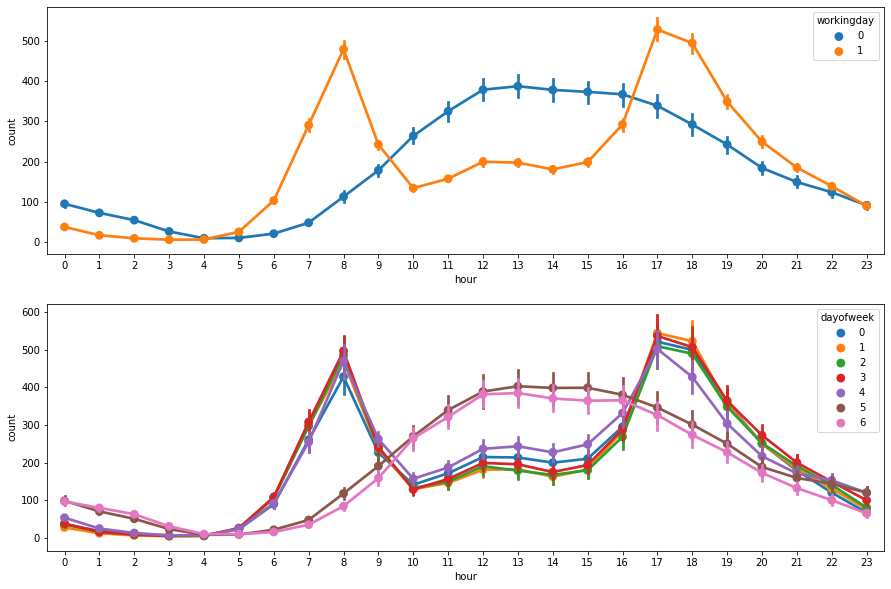

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

path2 = r'C:\Users\Administrator\bike-sharing-demand\train.csv'

df = pd.read_csv(path2, parse_dates=['datetime'])
df['dayofweek'] = df.datetime.dt.dayofweek
df['hour'] = df.datetime.dt.hour

fig, axes = plt.subplots(2)
fig.set_size_inches(15,10)
sns.pointplot(data=df,x='hour',y='count',hue='workingday',ax=axes[0])
sns.pointplot(data=df,x='hour',y='count',hue='dayofweek',ax=axes[1])
plt.show()